## Introduction
<p>We will be covering various ML algorithms while working on the Iris dataset. This is a common dataset and is referred to as the "Hello world" of machine learning.</p>
<h2>Problem Definition.</h2>
<p>Problem definition is broken down to four steps.
<ol>
    <li>Problem Feature - The dataset contains information about 3 different types of iris flowers: Iris Versicolor, Iris Virginica and Iris Setosa.
</li>   
    <li>Aim - to classify iris flowers among three species (setosa, versicolor or virginica) from measurements of length and width of sepals and petals </li>
    <li>Variables :
        <ul>
    <li>sepal_length: Sepal length, in centimeters, used as input.</li>
    <li>sepal_width: Sepal width, in centimeters, used as input.</li>
    <li>petal_length: Petal length, in centimeters, used as input.</li>
    <li>petal_width: Petal width, in centimeters, used as input.</li>
    <li>setosa: Iris setosa, true or false, used as target. </li>
    <li>versicolour: Iris versicolour, true or false, used as target.</li> 
    <li>virginica: Iris virginica, true or false, used as target.</li>
    </ul>
    </li>
     <li>Inputs- This is a clustering and classification problem. the dataset will be used as the input of all the algorithms</li>
<ol>
</p>

<h3>Imports</h3>
we will need various packages for our project

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pandas import get_dummies
import plotly.graph_objs as go
from sklearn import datasets
import plotly.plotly as py
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import scipy
import numpy
import json
import sys

<h3>Exploratory Data Analysis(EDA)</h3>
<p>BY use of graphical and numerical techiques we will uncover :
<ul>
    <li>Which varibles suggest interesting relationships.</li>
    <li>Which observations are unusual.</li>
</ul>
</p>

<h4>Data Collection.</h4>
 <p>This is the process of gathering and measuring data, information or any variables of interest in a standardized and established manner that enables the collector to answer or test hypothesis and evaluate outcomes of the particular collection.</p>
 <p>Iris dataset consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray.
The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.</p>

In [2]:
# load the dataset
dataset = pd.read_csv('Iris.csv')
type(dataset)

pandas.core.frame.DataFrame

In [3]:
dataset.shape

(150, 6)

In [4]:
print("The shape of the dataset is ",dataset.shape)
dataset.head(5)

The shape of the dataset is  (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h4>Visualization</h4>
<p>Data visualization is the presentation of data in a pictorial or graphical format. It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns.</p>


<h5>Scatter plots</h5>
<p>The purpose of a scatter plot to identify the type of relationship (if any) between two quantitative variables</p>

/home/muoki/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



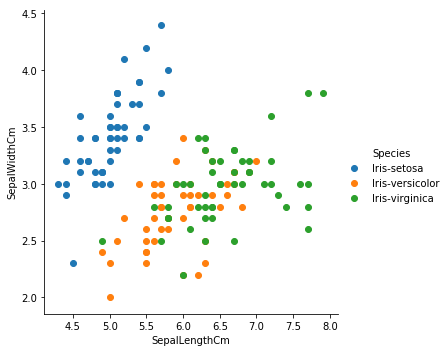

In [5]:
sns.FacetGrid(dataset, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

/home/muoki/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



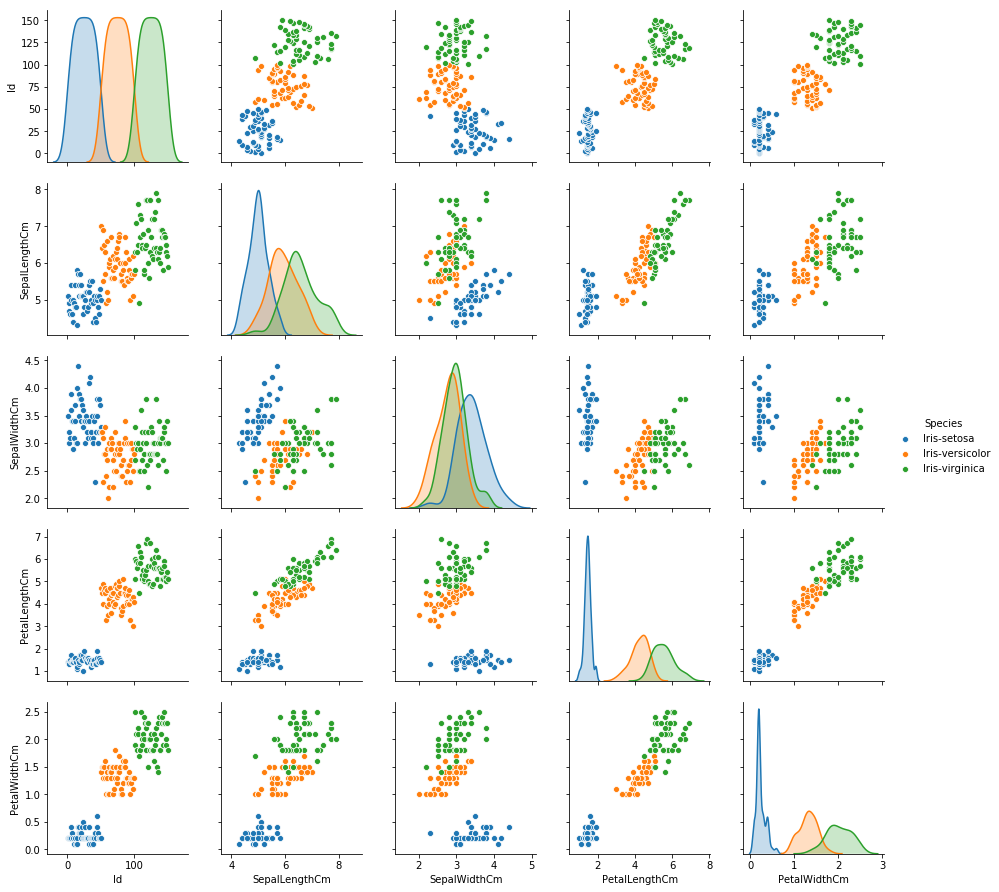

In [6]:
sns.pairplot(dataset, hue="Species")

<h5>Box Plot</h5>
<p>boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles.</p>

<Figure size 432x288 with 0 Axes>

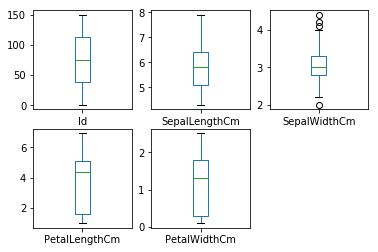

<Figure size 432x288 with 0 Axes>

In [7]:
dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.figure()

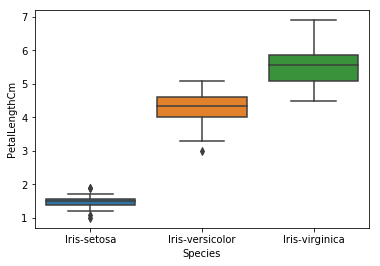

In [8]:
# To plot the species data using a box plot:

sns.boxplot(x="Species", y="PetalLengthCm", data=dataset )
plt.show()

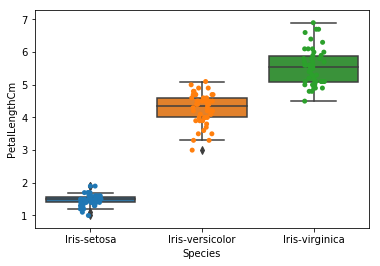

In [9]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis. 

ax= sns.boxplot(x="Species", y="PetalLengthCm", data=dataset)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=dataset, jitter=True, edgecolor="gray")
plt.show()



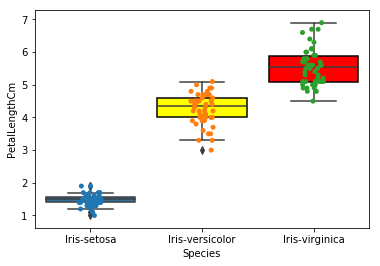

In [10]:
# Tweek the plot above to change fill and border color color using ax.artists.
# Assing ax.artists a variable name, and insert the box number into the corresponding brackets

ax= sns.boxplot(x="Species", y="PetalLengthCm", data=dataset)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=dataset, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()


<h4>Histogram</h4>
we can use a histogram of each input var